# Постановка задачи
### Проблема:

Представьте, что Вы работаете дата-сайентистом в компании Booking. Одна из проблем компании — это нечестные отели, которые накручивают себе рейтинг. Одним из способов обнаружения таких отелей является построение модели, которая предсказывает рейтинг отеля. Если предсказания модели сильно отличаются от фактического результата, то, возможно, отель ведёт себя нечестно, и его стоит проверить.

### Цель проекта: построить модель на основе алгоритмов машинного обучения, которая предсказывает рейтинг отеля.

### Задачи проекта:

* ознакомиться с входными данными
* изучить пример машинного обучения
* выполнить подготовку данных, которые будут использованы для обучения модели
* проверить эффективность предлагаемой модели, используя метрику MAPE
* принять участие в соревнованиях на площадке kaggle.com

# Знакомимся с данными
Первоначальная версия датасета содержит 17 полей со следующей информацией:

* hotel_address — адрес отеля;
* review_date — дата, когда рецензент разместил соответствующий отзыв;
* average_score — средний балл отеля, рассчитанный на основе последнего комментария за последний год;
* hotel_name — название отеля;
* reviewer_nationality — страна рецензента;
* negative_review — отрицательный отзыв, который рецензент дал отелю;
* review_total_negative_word_counts — общее количество слов в отрицательном отзыв;
* positive_review — положительный отзыв, который рецензент дал отелю;
* review_total_positive_word_counts — общее количество слов в положительном отзыве.
* reviewer_score — оценка, которую рецензент поставил отелю на основе своего опыта;
* total_number_of_reviews_reviewer_has_given — количество отзывов, которые рецензенты дали в прошлом;
* total_number_of_reviews — общее количество действительных отзывов об отеле;
* tags — теги, которые рецензент дал отелю;
* days_since_review — количество дней между датой проверки и датой очистки;
* additional_number_of_scoring — есть также некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки.
* lat — географическая широта отеля;
* lng — географическая долгота отеля.

# Импорт библиотек

In [6]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

import category_encoders as ce
from sklearn import preprocessing

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\anast\AppData\Roaming\nltk_data...


# Обзор данных

In [10]:
# Знакомимся с данными.
hotels = pd.read_csv('https://drive.google.com/file/d/1nHLC_jywlyA8iMoNLKOFrevVq6VVMAeP/view?usp=share_link')


In [11]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Columns: 784 entries, <!DOCTYPE html><html><head><meta name="google" content="notranslate"><meta http-equiv="X-UA-Compatible" content="IE=edge;"><style nonce="xhzYGcYiykmZfk2jEfRT2g">@font-face{font-family:'Roboto';font-style:italic;font-weight:400;src:url(//fonts.gstatic.com/s/roboto/v18/KFOkCnqEu92Fr1Mu51xMIzc.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:300;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmSU5fABc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:400;src:url(//fonts.gstatic.com/s/roboto/v18/KFOmCnqEu92Fr1Mu5mxP.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:500;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmEU9fABc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:700;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmWUl

In [4]:
df_train.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [6]:
sample_submission.head(2)

,reviewer_score,id
0,1,488440
1,10,274649


In [7]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


In [8]:
# Объединяем train и test в один датасет, чтобы обработать сразу все данные.
df_train['label'] = 1 # в будущем объединённом датасете создадим ярлычки для train и test, чтобы не перепутать
df_test['label'] = 0 
df_test['reviewer_score'] = 0 # задаём значения reviewer_score, так как в тесте их нет, их нужно предсказать, по этому пока просто заполняем нулями

hotels = df_test.append(df_train, sort=False).reset_index(drop=True)
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

In [9]:
hotels.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng,label,reviewer_score
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102,0,0.0
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443,0,0.0


Вот с этим и будем работать.

# **Преобразование данных**

### **Первичная обработка пропусков в датафрейме и переформатирование дат в datetime**

In [10]:
# Признаки широты и долготы в датасете имеют пропущенные значения. Заменим их пока на 0:
hotels = hotels.fillna(0)
# Приведём столбец с датой к формату datetime:
hotels['review_date'] = pd.to_datetime(hotels['review_date'])

### **Преобразование 'reviewer_nationality'**

In [11]:
hotels['reviewer_nationality'].value_counts()

 United Kingdom               245246
 United States of America      35437
 Australia                     21686
 Ireland                       14827
 United Arab Emirates          10235
                               ...  
 Comoros                           1
 Anguilla                          1
 Tuvalu                            1
 Cape Verde                        1
 Palau                             1
Name: reviewer_nationality, Length: 227, dtype: int64

In [12]:
# Кодируем бинарным кодированием.
bin_encoder = ce.BinaryEncoder(cols=['reviewer_nationality']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(hotels['reviewer_nationality'])
hotels = pd.concat([hotels, type_bin], axis=1)

hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 26 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515738 non-null  object        
 1   additional_number_of_scoring                515738 non-null  int64         
 2   review_date                                 515738 non-null  datetime64[ns]
 3   average_score                               515738 non-null  float64       
 4   hotel_name                                  515738 non-null  object        
 5   reviewer_nationality                        515738 non-null  object        
 6   negative_review                             515738 non-null  object        
 7   review_total_negative_word_counts           515738 non-null  int64         
 8   total_number_of_reviews                     515738 non-null  int64        

### **Работа с признаком 'hotel_address'**

In [13]:
# Выделяем признак города из адреса отеля
hotels['city'] = hotels['hotel_address'].str.split()
hotels['city'] = hotels['city'].apply(lambda x: x[-2])
hotels['city'] = hotels['city'].apply(lambda x: 'London' if x == 'United' else x)

# Кодируем значения методом OneHotEncoding:
encoder = ce.OneHotEncoder(cols=['city'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(hotels['city'])
hotels = pd.concat([hotels, type_bin], axis=1)

hotels.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,reviewer_nationality_5,reviewer_nationality_6,reviewer_nationality_7,city,city_Milan,city_Amsterdam,city_Barcelona,city_London,city_Paris,city_Vienna
0,Via Senigallia 6 20161 Milan Italy,904,2017-07-21,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,...,0,0,1,Milan,1,0,0,0,0,0
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,2016-12-12,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,...,0,1,0,Amsterdam,0,1,0,0,0,0
2,Mallorca 251 Eixample 08008 Barcelona Spain,46,2015-11-26,8.3,Alexandra Barcelona A DoubleTree by Hilton,Sweden,Pillows,3,351,Nice welcoming and service,...,0,1,1,Barcelona,0,0,1,0,0,0


### **Работа с признаком 'tags'**

**Формируем признак количества ночей**

In [14]:
# сформируем новый признак с количеством проведённых ночей в отелях с помощью регулярного выражения:
regex = '\d night'
hotels['cnt_nights'] = hotels['tags'].str.findall(regex).str.get(0)
# 146 пропущенных значений заменим на 0
hotels['cnt_nights'] = hotels['cnt_nights'].fillna(0) 
# Преобразуем строки в числовые значения.
hotels['cnt_nights'] = hotels['cnt_nights'].apply(lambda x: int(str(x).split()[0])) 

hotels['cnt_nights'].head()

0    2
1    1
2    1
3    1
4    2
Name: cnt_nights, dtype: int64

In [15]:
def update_tags(st):
    '''
    Функция преобразования признака 'tags' в более удобный строковый вид
    '''
    st = st.replace('[', '')
    st = st.replace(']', '')
    st = st.replace("'", '')
    st = st.replace('[', '')
    return st

hotels['tags'] = hotels['tags'].apply(update_tags)
hotels['tags'][0]

' Leisure trip ,  Couple ,  Double Room ,  Stayed 2 nights '

In [16]:
# Создадим и преобразуем признак категории путешественников:

hotels['travelers'] = hotels['tags'].str.replace('.Leisure.trip..', '', regex=True)
hotels['travelers'] = hotels['travelers'].str.replace('.Business.trip..', '', regex=True)
hotels['travelers'] = hotels['travelers'].str.split(',')
hotels['travelers'] = hotels['travelers'].apply(lambda x: x[0])
hotels['travelers'] = hotels['travelers'].str.lstrip(' ')
hotels['travelers'] = hotels['travelers'].str.rstrip(' ')
hotels['travelers'].value_counts()

Couple                        251554
Solo traveler                 108336
Group                          65251
Family with young children     60791
Family with older children     26258
Travelers with friends          2143
With a pet                      1405
Name: travelers, dtype: int64

In [17]:
# Кодировка признака 'travelers'. Для 7 категориальных значений подойдёт OneHotEncoder:

encoder = ce.OneHotEncoder(cols=['travelers'], use_cat_names=True)
type_bin = encoder.fit_transform(hotels['travelers'])
hotels = pd.concat([hotels, type_bin], axis=1)

hotels.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,city_Vienna,cnt_nights,travelers,travelers_Couple,travelers_Group,travelers_Solo traveler,travelers_Family with young children,travelers_Family with older children,travelers_With a pet,travelers_Travelers with friends
0,Via Senigallia 6 20161 Milan Italy,904,2017-07-21,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,...,0,2,Couple,1,0,0,0,0,0,0
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,2016-12-12,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,...,0,1,Group,0,1,0,0,0,0,0


In [18]:
# Создадим признак комнаты в отеле

hotels['rooms'] = hotels['tags'].str.replace('.Leisure.trip..', '', regex=True)
hotels['rooms'] = hotels['rooms'].str.replace('.Business.trip..', '', regex=True)
hotels['rooms'] = hotels['rooms'].str.replace('^.*Solo traveler.,', '', regex=True)
hotels['rooms'] = hotels['rooms'].str.replace('^.*Family with older children.,', '', regex=True)
hotels['rooms'] = hotels['rooms'].str.replace('^.*Couple.,', '', regex=True)
hotels['rooms'] = hotels['rooms'].str.replace('^.*Group.,', '', regex=True)
hotels['rooms'] = hotels['rooms'].str.replace('^.*Travelers with friends.,', '', regex=True)
hotels['rooms'] = hotels['rooms'].str.replace('^.*Family with young children.,', '', regex=True)
hotels['rooms'] = hotels['rooms'].str.replace('^.*With a pet.,', '', regex=True)
hotels['rooms'] = hotels['rooms'].str.split(',')
hotels['rooms'] = hotels['rooms'].apply(lambda x: x[0])
hotels['rooms'] = hotels['rooms'].str.lstrip(' ')
hotels['rooms'] = hotels['rooms'].str.rstrip(' ')

hotels['rooms'].value_counts()

Double Room                           35207
Standard Double Room                  32248
Superior Double Room                  31393
Deluxe Double Room                    24823
Double or Twin Room                   22393
                                      ...  
Superior Junior Suite Single Use          1
Superior Suite Water Front                1
Suite Aurore                              1
Executive Suite 1 King                    1
Quadruple Room 2 Adults 2 Children        1
Name: rooms, Length: 2393, dtype: int64

In [19]:
# Признак 'rooms' оказался с очень большим количеством уникальных значений.
# Кодируем бинарным кодированием.

bin_encoder = ce.BinaryEncoder(cols=['rooms']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(hotels['rooms'])
hotels = pd.concat([hotels, type_bin], axis=1)

hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 55 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515738 non-null  object        
 1   additional_number_of_scoring                515738 non-null  int64         
 2   review_date                                 515738 non-null  datetime64[ns]
 3   average_score                               515738 non-null  float64       
 4   hotel_name                                  515738 non-null  object        
 5   reviewer_nationality                        515738 non-null  object        
 6   negative_review                             515738 non-null  object        
 7   review_total_negative_word_counts           515738 non-null  int64         
 8   total_number_of_reviews                     515738 non-null  int64        

**Создаём признак написания отзыва с мобильного**

In [20]:
# Submitted from a mobile device: да(1) или нет(0)

hotels['Submitted from a mobile device'] = hotels['tags'].apply(lambda x: 1 if 'Submitted from a mobile device' in x else 0)
hotels['Submitted from a mobile device']

0         0
1         0
2         1
3         0
4         1
         ..
515733    1
515734    1
515735    0
515736    0
515737    0
Name: Submitted from a mobile device, Length: 515738, dtype: int64

**Создадим признак типа поездки trip_type,где:**
* 1 - поездка для отдыха
* 2 - деловая поездка
* 0 - не указано

In [21]:
# Создадим признак типа поездки trip_type:
def trip_type(x):
    if x.split(',')[0] == ' Leisure trip ':
        return 1  # поездка для отдыха
    elif x.split(',')[0] == ' Business trip ':
        return 2   # деловая поездка
    else:
        return 0    # другое
    
hotels['trip_type'] = hotels['tags'].apply(trip_type)

In [22]:
hotels['trip_type'].value_counts()

1    416672
2     82748
0     16318
Name: trip_type, dtype: int64

### **Кодируем названия отелей**

In [23]:
hotels['hotel_name'].value_counts()

Britannia International Hotel Canary Wharf           4789
Strand Palace Hotel                                  4256
Park Plaza Westminster Bridge London                 4169
Copthorne Tara Hotel London Kensington               3578
DoubleTree by Hilton Hotel London Tower of London    3212
                                                     ... 
Hotel Eitlj rg                                         12
Hotel Daniel Paris                                     12
Mercure Paris Porte d Orleans                          10
Hotel Wagner                                           10
Hotel Gallitzinberg                                     8
Name: hotel_name, Length: 1492, dtype: int64

In [24]:
bin_encoder = ce.BinaryEncoder(cols=['hotel_name']) # Используем бинарное кодирование
type_bin = bin_encoder.fit_transform(hotels['hotel_name'])
hotels = pd.concat([hotels, type_bin], axis=1)

hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 68 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515738 non-null  object        
 1   additional_number_of_scoring                515738 non-null  int64         
 2   review_date                                 515738 non-null  datetime64[ns]
 3   average_score                               515738 non-null  float64       
 4   hotel_name                                  515738 non-null  object        
 5   reviewer_nationality                        515738 non-null  object        
 6   negative_review                             515738 non-null  object        
 7   review_total_negative_word_counts           515738 non-null  int64         
 8   total_number_of_reviews                     515738 non-null  int64        

### **Работа с признаком 'review_date'**

In [25]:
# Извлекаем признак месяца из даты
hotels['review_season'] = hotels['review_date'].dt.month

def seasons(i):
    if i in [1, 2, 12]:
        return 1
    elif i in [3, 4, 5]:
        return 2
    elif i in [6, 7, 8]:
        return 3
    else:
        return 4
    
hotels['review_season'] = hotels['review_season'].apply(seasons)
hotels['review_season']

0         3
1         1
2         4
3         4
4         2
         ..
515733    2
515734    1
515735    1
515736    2
515737    3
Name: review_season, Length: 515738, dtype: int64

### **Преобразование days_since_review**

In [26]:
hotels['days_since_review'] = hotels['days_since_review'].apply(lambda x: int(x.split()[0]))

### **Обработка положительных и отрицательных отзывов**

Создадим новые признаки с нормализованной оценкой позитива и негатива в отзывах с помощью анализатора **SentimentIntensityAnalyzer**.

Разобрался с ним с помощью [этой статьи](https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664)

In [27]:
%%time

sid = SentimentIntensityAnalyzer()

# Создаём два новых признака. Анализатор принимает строку и возвращает словарь оценок в каждой из четырех категорий: 
# отриц. (neg) 
# нейтр.(neu) 
# положит.(pos) 
# compound (рассчитывается путем нормализации оценок, приведенных выше)

hotels['positive'] = hotels.positive_review.apply(lambda x: sid.polarity_scores(x))
hotels['negative'] = hotels.negative_review.apply(lambda x: sid.polarity_scores(x))   
# Выделяем оценку из словаря по ключу:
hotels['positive'] = hotels['positive'].apply(lambda x: x['compound'])
hotels['negative'] = hotels['negative'].apply(lambda x: x['compound'])


print('Диапазон значений негатив-позитив:  ', hotels['negative'].min(),'...', hotels['positive'].max())

Диапазон значений негатив-позитив:   -0.9981 ... 0.9993
CPU times: user 4min 40s, sys: 613 ms, total: 4min 41s
Wall time: 4min 41s


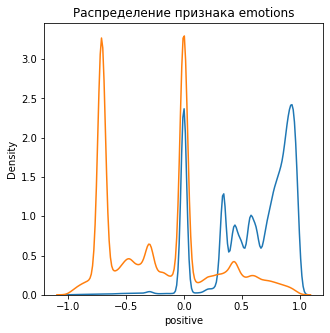

In [28]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(5, 5))
ax1.set_title('Распределение признака emotions')
sns.kdeplot(hotels['positive'], ax=ax1)
sns.kdeplot(hotels['negative'], ax=ax1);



# **Нормализация/стандартизация**

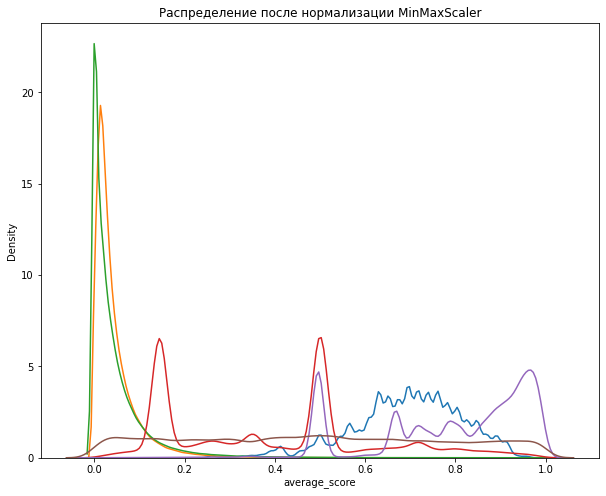

In [29]:
cols = ['average_score', 'trip_type', 'review_season', 'cnt_nights', 'positive', 'negative',
        'days_since_review', 'additional_number_of_scoring', 'total_number_of_reviews',
       'total_number_of_reviews_reviewer_has_given', 'review_total_negative_word_counts', 'review_total_positive_word_counts']

# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# копируем исходный датасет
df_mm = mm_scaler.fit_transform(hotels[cols])

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
hotels[cols] = pd.DataFrame(df_mm, columns=cols)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределение после нормализации MinMaxScaler')

sns.kdeplot(hotels['average_score'], ax=ax1)
sns.kdeplot(hotels['review_total_positive_word_counts'], ax=ax1)
sns.kdeplot(hotels['review_total_negative_word_counts'], ax=ax1)
sns.kdeplot(hotels['negative'], ax=ax1)
sns.kdeplot(hotels['positive'], ax=ax1)
sns.kdeplot(hotels['days_since_review'], ax=ax1);

# **Отбор признаков**

In [30]:
# Поскольку модель может работать только с числовыми значениями, удалим признаки типа object.
colls_for_drop = ['hotel_address', 'review_date', 'hotel_name', 'reviewer_nationality', 
                 'negative_review', 'positive_review', 'tags',  
                 'rooms', 'city', 'travelers', 'lat', 'lng']
hotels = hotels.drop(colls_for_drop, axis=1)

### **Оценка значимости признаков**
Для оценки значимости категориальных признаков будем использовать тест хи-квадрат, для непрерывных признаков — тест ANOVA.

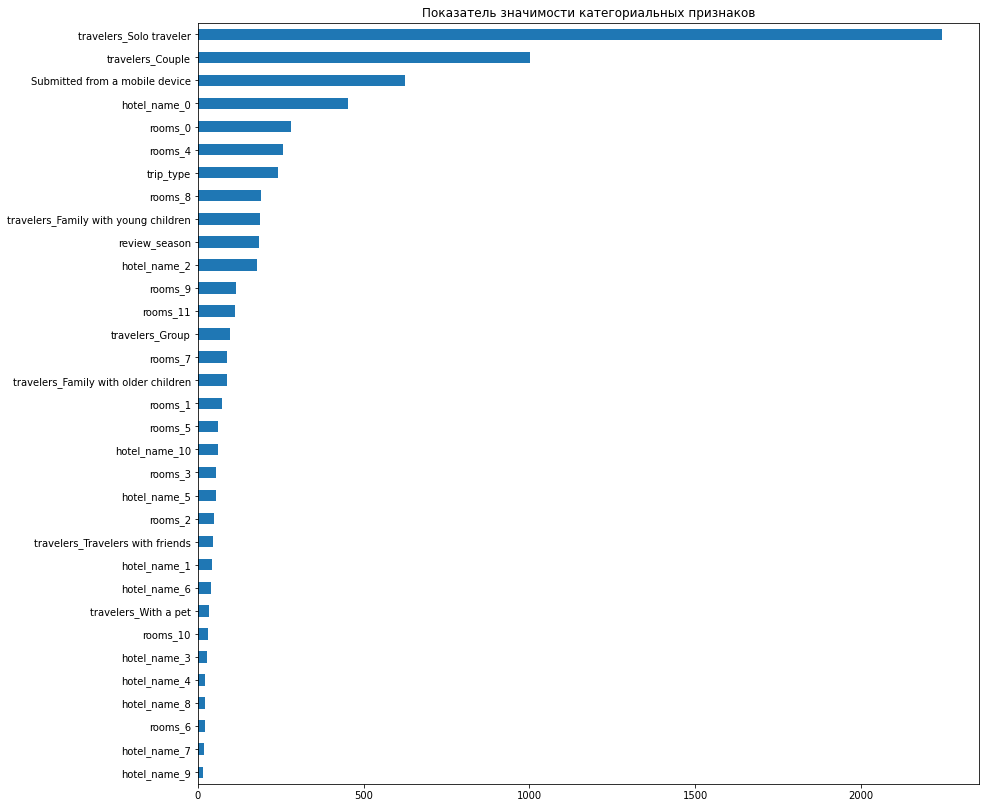

In [31]:
y=hotels['reviewer_score'].astype('int')
X = hotels

# категориальные признаки
cat_cols = ['trip_type', 'review_season',  
       'travelers_Couple', 'travelers_Group',
       'travelers_Solo traveler', 'travelers_Family with young children',
       'travelers_Family with older children', 'travelers_With a pet',
       'travelers_Travelers with friends', 'Submitted from a mobile device',
       'rooms_0', 'rooms_1', 'rooms_2', 'rooms_3', 'rooms_4',
       'rooms_5', 'rooms_6', 'rooms_7', 'rooms_8', 'rooms_9', 'rooms_10',
       'rooms_11', 'hotel_name_0', 'hotel_name_1', 'hotel_name_2', 'hotel_name_3',
       'hotel_name_4', 'hotel_name_5', 'hotel_name_6', 'hotel_name_7',
       'hotel_name_8', 'hotel_name_9', 'hotel_name_10']

from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)

fig, (ax2) = plt.subplots(ncols=1, figsize=(14, 14))
ax2.set_title('Показатель значимости категориальных признаков')
imp_cat.plot(kind = 'barh', ax = ax2);

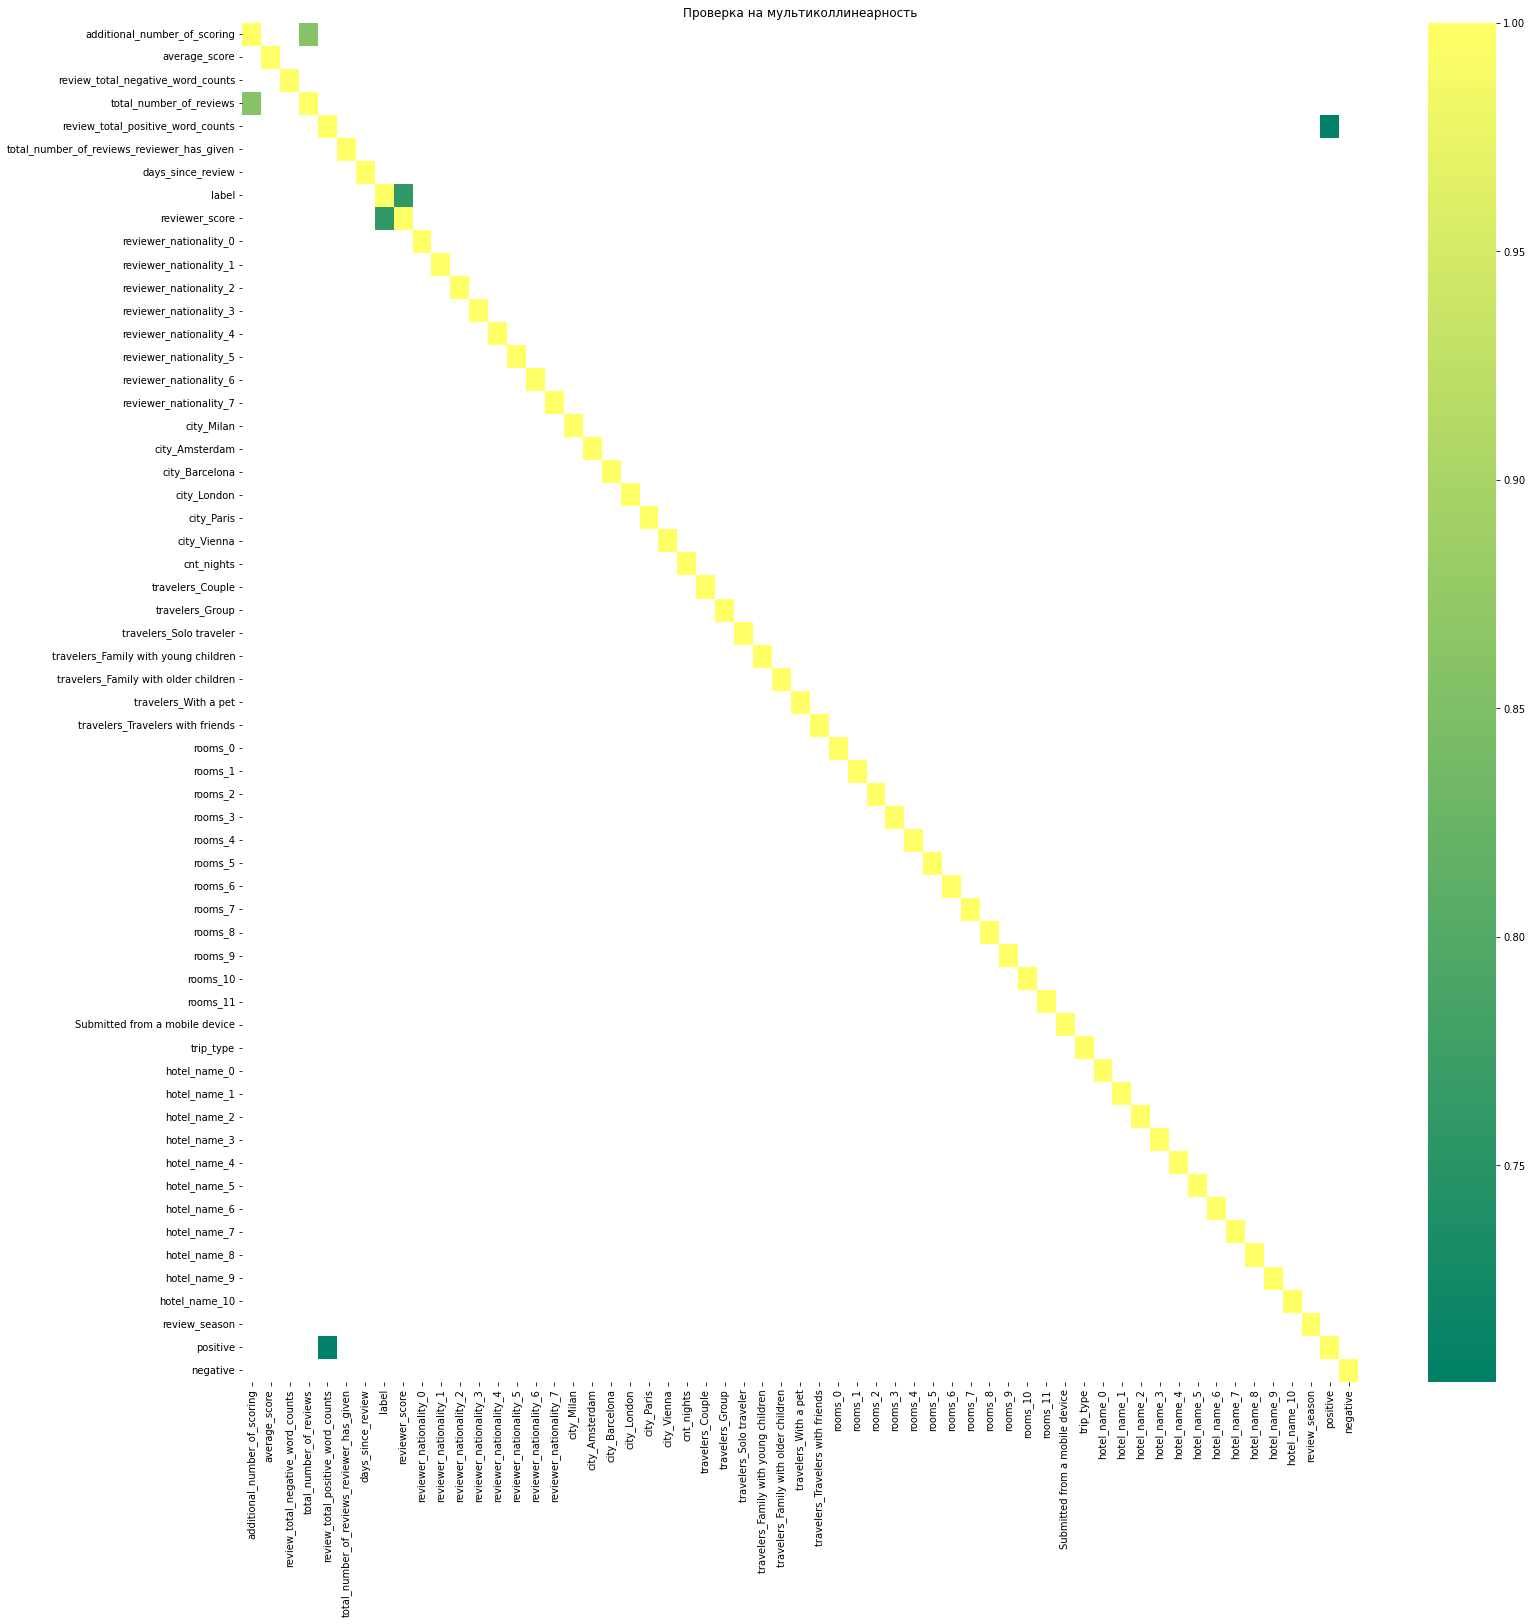

In [32]:
# Для корреляции с категориальными признаками будем использовать метод Спирмена
corr = hotels.corr(method = 'spearman')

# выведем только данные с высоким уровнем корреляции
mask_1 = np.abs(corr) >= 0.7
mask_2 = np.abs(corr) <= -0.7

corr_data = corr[mask_1 | mask_2]


# проверка признака на мультиколлинеарность
fig, (ax2) = plt.subplots(ncols=1, figsize=(25, 25))
ax2.set_title('Проверка на мультиколлинеарность')
sns.heatmap(corr_data, cmap='summer', ax=ax2);

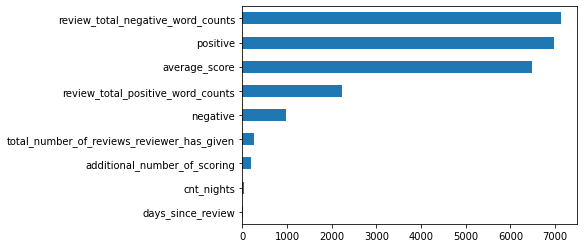

In [33]:
# непрерывные признаки
num_cols = [
    'additional_number_of_scoring', 
    'average_score', 'negative', 'positive',
    'review_total_negative_word_counts', 
    'review_total_positive_word_counts', 
    'total_number_of_reviews_reviewer_has_given',
    'days_since_review',
    'cnt_nights'] 


from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh');

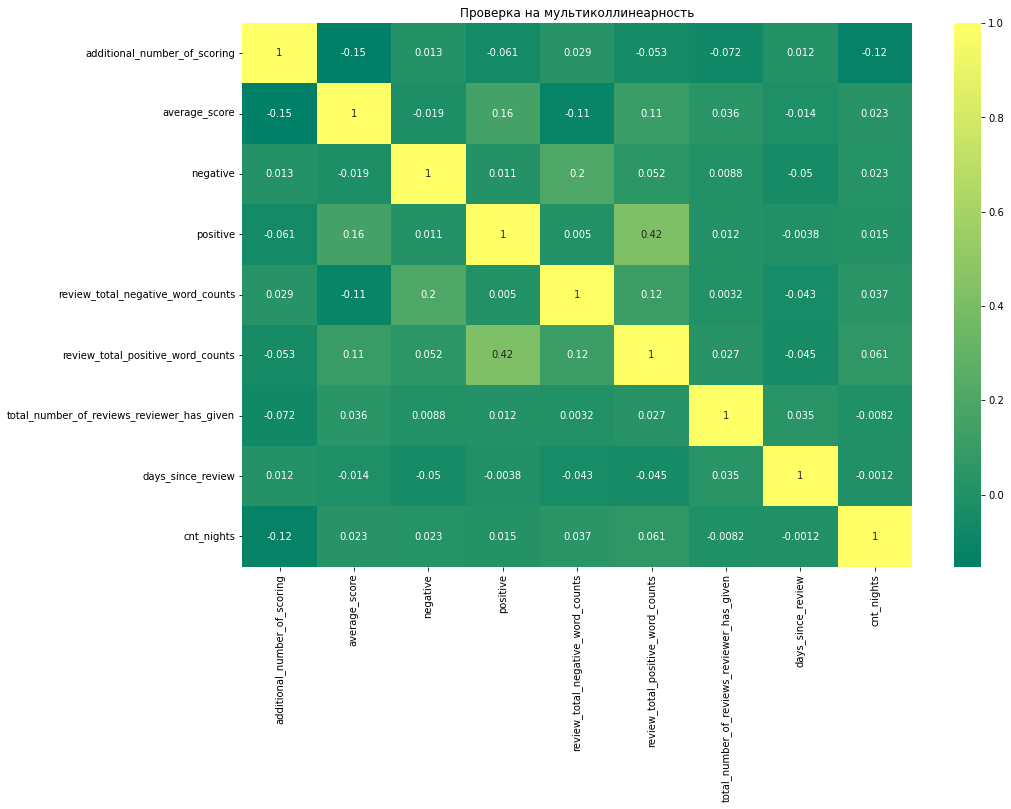

In [34]:
# проверка признака на мультиколлинеарность
fig, (ax2) = plt.subplots(ncols=1, figsize=(15, 10))
ax2.set_title('Проверка на мультиколлинеарность')
sns.heatmap(hotels[num_cols].corr(), annot=True, cmap='summer', ax=ax2);

In [35]:
cols_for_drop_2 = [
 'total_number_of_reviews_reviewer_has_given',
 'hotel_name_9',
 'hotel_name_7',
 'rooms_6',
 'hotel_name_8',
 'hotel_name_4',
 'hotel_name_3',
 'rooms_10',
 'days_since_review',
 'hotel_name_6',
 'hotel_name_1',
 'rooms_2',
 'hotel_name_5',
 'rooms_3',
 'hotel_name_10',
 'rooms_5',
 'rooms_1',
 'rooms_7',
 'rooms_11',
 'rooms_9',
 'hotel_name_2',
 'rooms_8',
 'rooms_4',
 'rooms_0',
 'hotel_name_0']
hotels = hotels.drop(cols_for_drop_2, axis=1)
hotels.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 34 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   additional_number_of_scoring          515738 non-null  float64
 1   average_score                         515738 non-null  float64
 2   review_total_negative_word_counts     515738 non-null  float64
 3   total_number_of_reviews               515738 non-null  float64
 4   review_total_positive_word_counts     515738 non-null  float64
 5   label                                 515738 non-null  int64  
 6   reviewer_score                        515738 non-null  float64
 7   reviewer_nationality_0                515738 non-null  int64  
 8   reviewer_nationality_1                515738 non-null  int64  
 9   reviewer_nationality_2                515738 non-null  int64  
 10  reviewer_nationality_3                515738 non-null  int64  
 11  

In [36]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
train_data = hotels[hotels['label']== 1].drop(['label'], axis=1)
test_data = hotels[hotels['label']== 0].drop(['label'], axis=1)

# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = train_data.drop(['reviewer_score'], axis=1)
y = train_data['reviewer_score']        

In [37]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [38]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [39]:
%%time

# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


CPU times: user 4min 54s, sys: 1.65 s, total: 4min 56s
Wall time: 4min 56s


In [40]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.1255574799016991


In [41]:
test_data.head()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,reviewer_score,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,...,travelers_Solo traveler,travelers_Family with young children,travelers_Family with older children,travelers_With a pet,travelers_Travelers with friends,Submitted from a mobile device,trip_type,review_season,positive,negative
0,0.336815,0.630435,0.127451,1.000000,0.156962,0.0,0,0,0,0,...,0,0,0,0,0,0,0.5,0.666667,0.980933,0.472650
1,0.227900,0.739130,0.024510,0.299212,0.000000,0.0,0,0,0,0,...,0,0,0,0,0,0,0.5,0.000000,0.667440,0.352018
2,0.016785,0.673913,0.007353,0.018524,0.012658,0.0,0,0,0,0,...,1,0,0,0,0,1,1.0,1.000000,0.844388,0.500426
3,0.089519,0.847826,0.000000,0.090215,0.068354,0.0,0,0,0,0,...,0,0,0,0,0,0,0.5,1.000000,0.957629,0.144648
4,0.310705,0.847826,0.000000,0.279305,0.017722,0.0,0,0,0,0,...,1,0,0,0,0,1,1.0,0.333333,0.885195,0.144648


In [42]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [43]:
sample_submission

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596
...,...,...
128930,7,495812
128931,1,315577
128932,3,511968
128933,6,303386


In [44]:
predict_submission = regr.predict(test_data)

In [45]:
predict_submission

array([8.716, 7.263, 8.802, ..., 8.322, 9.514, 7.471])

In [46]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.716,488440
1,7.263,274649
2,8.802,374688
3,9.687,404352
4,9.626,451596
5,9.164,302161
6,7.783,317079
7,7.599,13963
8,8.112,159785
9,7.436,195089
